# Five Personality Traits Clustering with K-Means and 
# Assigment 3

Big Five personality traits, also known as the five-factor model (FFM) and the OCEAN model, is for grouping different personality traits.

This theory uses descriptors of common language and suggests five broad dimensions commonly used to describe the human personality and psyche. The theory identifies five factors:

* Openness to experience (inventive/curious vs. consistent/cautious)
* Conscientiousness (efficient/organized vs. easy-going/careless)
* Extroversion (outgoing/energetic vs. solitary/reserved)
* Agreeableness (friendly/compassionate vs. challenging/detached)
* Neuroticism (sensitive/nervous vs. secure/confident)


This data set was collected (2016-2018) through an interactive on-line personality test. The personality test was constructed from the IPIP. You can see more from https://www.kaggle.com/datasets/tunguz/big-five-personality-test 


The scale was labeled between 1=Disagree, 3=Neutral, 5=Agree.

You can see the questions in the codebook.txt or at the https://ipip.ori.org/new_ipip-50-item-scale.htm website and from the Goldberg paper 

Resources:

[1].Goldberg, L. R. (1992). The development of markers for the Big-Five factor structure. Psychological Assessment, 4, 26-42.

[2]https://openpsychometrics.org/tests/IPIP-BFFM/




In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Loading the Data Set
The dataset is quite big, it might take a while.

In [20]:

data = pd.read_csv('C:/Users/86158/Desktop/semester 3/Personalisation-22-23-main/Personalisation-22-23-main/data/data-small.csv')
pd.options.display.max_columns = 150

print('Number of participants: ', len(data))
data.head()


Number of participants:  50000


,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,549499,2.0,3.0,2.0,2.0,5.0,1.0,3.0,1.0,5.0,2.0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,4.0,5.0,3.0,2.0,3.0,1.0,4.0,2.0,3.0,3.0,3.0,5.0,4.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,4.0,TR
1,811367,2.0,3.0,2.0,4.0,3.0,3.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,5.0,3.0,3.0,2.0,4.0,2.0,4.0,3.0,5.0,2.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,US
2,450151,4.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,2.0,1.0,5.0,2.0,3.0,5.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,4.0,3.0,2.0,4.0,1.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,5.0,1.0,3.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,US
3,919073,1.0,4.0,3.0,5.0,1.0,2.0,1.0,5.0,1.0,4.0,2.0,4.0,2.0,3.0,2.0,2.0,2.0,1.0,4.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,4.0,3.0,1.0,2.0,3.0,5.0,3.0,4.0,1.0,5.0,1.0,1.0,2.0,3.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,5.0,4.0,4.0,US
4,894414,3.0,1.0,4.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,4.0,3.0,3.0,3.0,3.0,1.0,2.0,2.0,3.0,2.0,4.0,4.0,MY


## Understanding the Data Set

In [21]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  4504
Number of participants after eliminating missing values:  49906


In [22]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

In [23]:
#Load in questions databank
import json
with open("C:/Users/86158/Desktop/semester 3/Personalisation-22-23-main/Personalisation-22-23-main/data/questions.json", "r") as fp:
    questions = json.load(fp)
traits = list(questions.keys())
colours = plt.colormaps.get("rainbow")

In [24]:
#Helper functions
def keys_for_trait(trait):
    return list(questions[trait].keys())

def questions_for_trait(trait):
    return list(questions[trait].values())

#Plot histogram for responses to each question
def vis_questions(trait, color):
    fig, ax = plt.subplots(2,5,figsize=(12,2))
    plt.subplots_adjust(bottom=0, top=2.5)
    qs = questions_for_trait(trait)
    codes = keys_for_trait(trait)
    for i in range(10):
        plot = ax[int(np.floor(i/5)),i%5]
        plot.hist(data[codes[i]], bins=14, color= color, alpha=.5)
        plot.set_title(qs[i], fontsize=8)
        plot.set_yticks([])
        plot.set_xticks(np.arange(0,6))

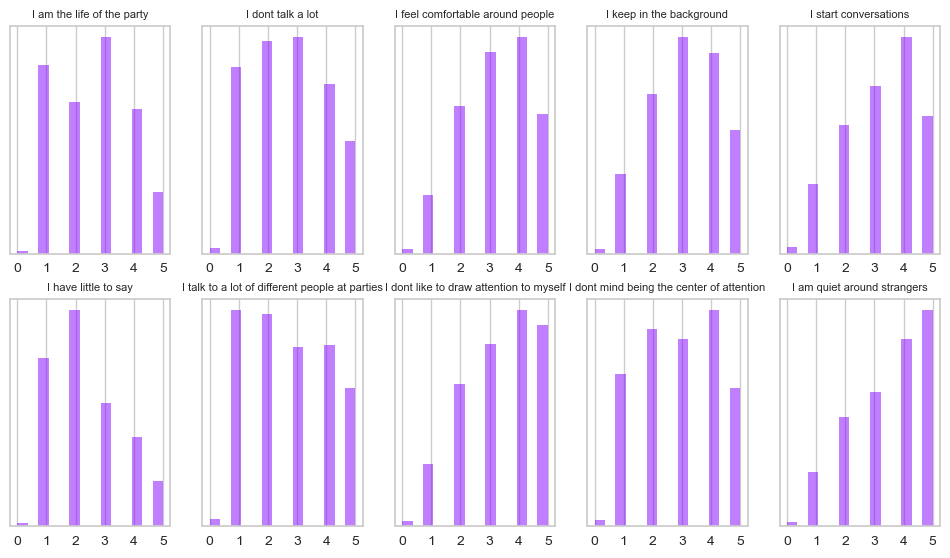

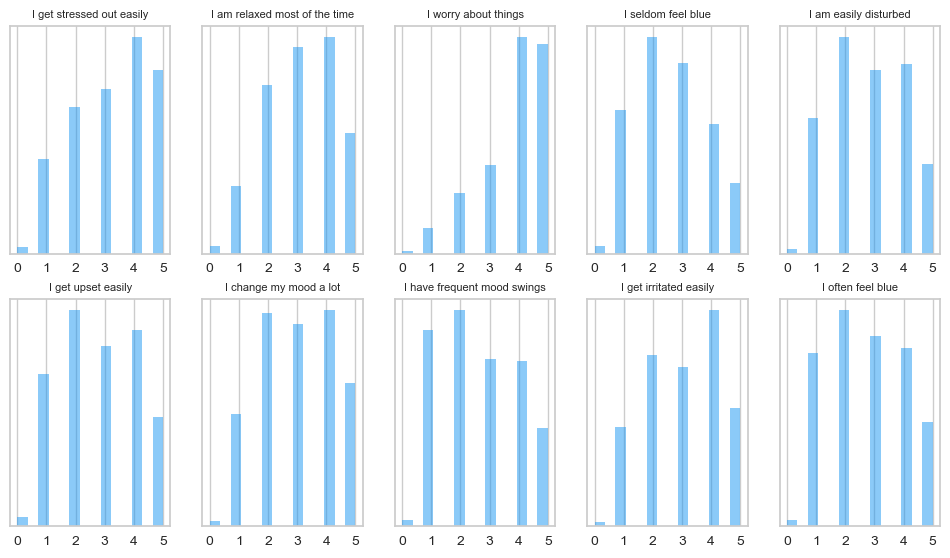

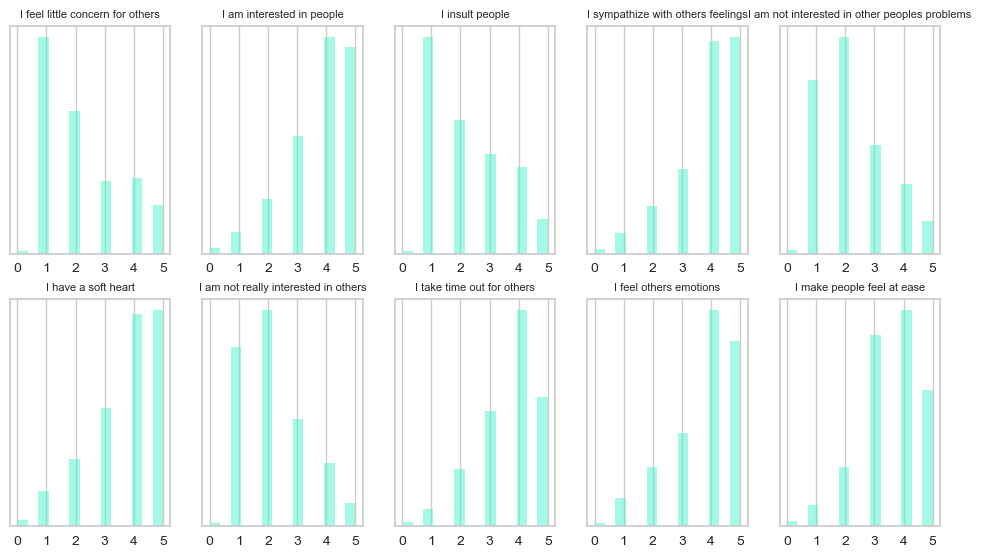

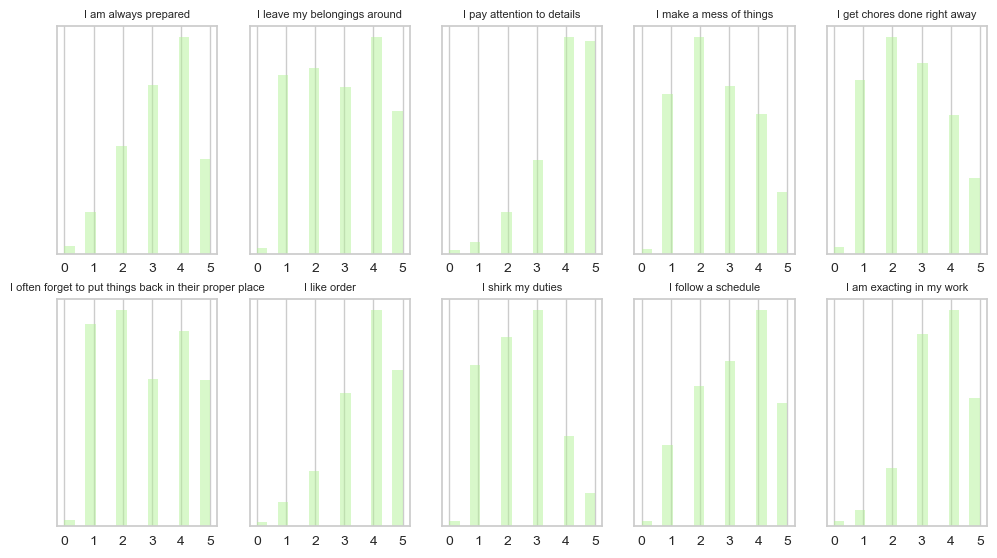

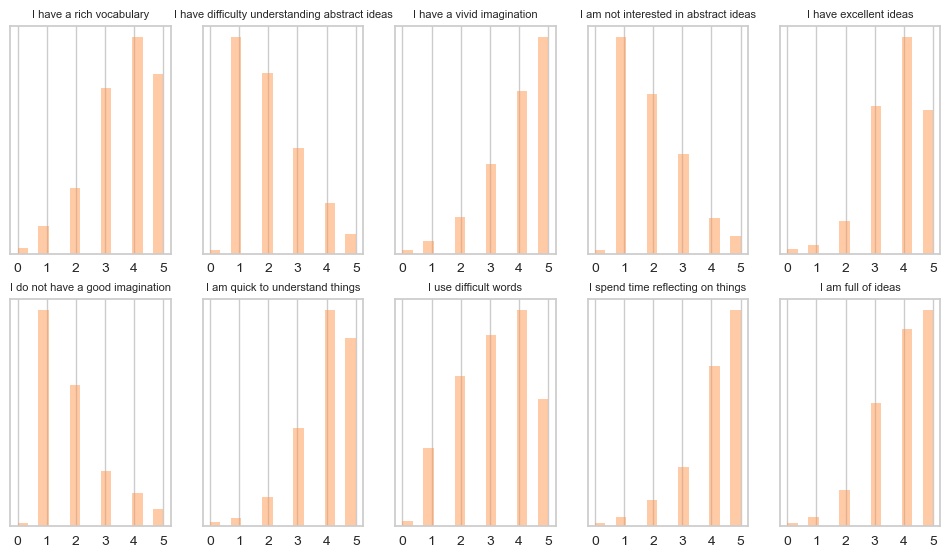

In [25]:
#Plot all questions
for i,t in enumerate(traits):
    vis_questions(t, colours(i/5)) 

## How many clusters should we define?

Clustering is a task of identifying similar instances and assigning them to clusters or groups of similar interest. (Geron, 2023)

In [26]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

In [27]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import warnings
warnings.filterwarnings("ignore")

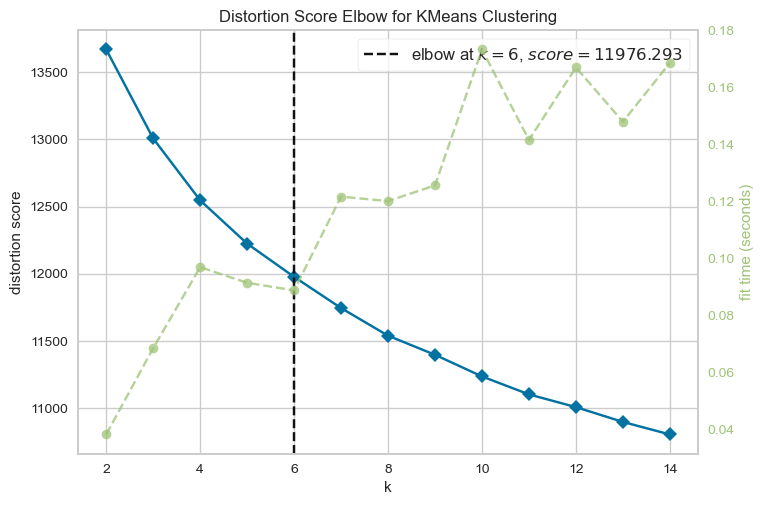

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

As you can see 5 clusters looks optimum for the data set and we already know this researh is to identify 5 different personalities.

## Clustering Participants into 5 Personality Groups



## K-Means

[K-means](http://https//www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/) is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

In [30]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# Use the unscaled data but without the country column
df_model = data.drop('country', axis=1)

# Define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [31]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,549499,2.0,3.0,2.0,2.0,...,4.0,3.0,3.0,4.0,4
1,811367,2.0,3.0,2.0,4.0,...,4.0,4.0,4.0,4.0,1
2,450151,4.0,1.0,5.0,1.0,...,5.0,5.0,5.0,5.0,4
3,919073,1.0,4.0,3.0,5.0,...,5.0,5.0,4.0,4.0,2
4,894414,3.0,1.0,4.0,3.0,...,3.0,2.0,4.0,4.0,2


## Analysing the Model and Predictions

How many individual do we have for each cluster?

In [32]:
df_model.Clusters.value_counts()

0    10365
3    10128
4    10001
1     9806
2     9606
Name: Clusters, dtype: int64

Let's group the results acording to clusters. That way we can investigate the average answer to the each question for each cluster.

That way we can have an intuition about how our model classifies people.

In [33]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,104457.111819,2.624988,2.823734,3.270333,3.189966,3.239846,2.503232,2.766040,3.444187,2.977038,3.585432,3.216594,3.248046,3.828558,2.681235,2.806850,2.828075,3.055282,2.660685,3.101688,2.757356,2.299855,3.789001,2.353980,3.890014,2.307863,3.720116,2.238591,3.650072,3.741823,3.544042,3.264834,2.963821,3.933623,2.641100,2.562759,2.846310,3.675639,2.505644,3.147612,3.547902,3.639846,2.109600,3.987651,2.069561,3.754462,1.922238,3.970092,3.156874,4.078437,3.910950
1,717414.204467,2.637773,2.765960,3.249031,3.140118,3.264022,2.348256,2.738018,3.393127,2.966653,3.560473,3.290128,3.120131,3.841628,2.619621,2.822456,2.825515,3.050173,2.698144,3.103304,2.804303,2.221293,3.833469,2.288599,3.929635,2.279727,3.716296,2.197430,3.680808,3.774628,3.580971,3.311136,2.977361,3.979910,2.613196,2.592290,2.859678,3.681114,2.458087,3.179686,3.604732,3.719865,1.991026,4.026616,1.908831,3.830614,1.877320,4.006119,3.286967,4.194269,4.004895
2,914715.470747,2.663544,2.745888,3.324797,3.133042,3.315011,2.332396,2.789090,3.393296,2.973454,3.541849,3.296377,3.139080,3.864876,2.631793,2.830210,2.830731,3.034249,2.667812,3.052571,2.780762,2.193317,3.877160,2.176869,3.973246,2.239538,3.775245,2.164897,3.730377,3.824797,3.621382,3.358734,2.910369,3.993546,2.547158,2.687071,2.776286,3.750260,2.392775,3.271289,3.643764,3.702374,2.029148,4.007495,1.926817,3.836873,1.870185,4.012909,3.225276,4.179575,3.992817
3,311836.240719,2.672591,2.759479,3.297097,3.144352,3.291568,2.430095,2.799269,3.423381,2.957050,3.538408,3.323558,3.148203,3.886947,2.713369,2.894451,2.901264,3.090936,2.734005,3.107919,2.772709,2.326817,3.821584,2.259676,3.935821,2.272611,3.772117,2.192634,3.693523,3.814080,3.611868,3.280115,2.925948,3.995656,2.668246,2.691746,2.859301,3.685723,2.491311,3.193918,3.588566,3.611276,2.175553,3.988349,2.098934,3.759182,1.911236,3.939870,3.106438,4.074743,3.933353
4,516189.047495,2.644736,2.757524,3.282272,3.125987,3.285871,2.402560,2.787321,3.419258,2.978702,3.532347,3.287171,3.167383,3.834217,2.677132,2.842816,2.833617,3.042696,2.672833,3.090891,2.779222,2.277972,3.830317,2.252575,3.910309,2.252275,3.741526,2.201580,3.683932,3.781522,3.600340,3.289071,2.898810,3.994501,2.598440,2.644736,2.821918,3.719128,2.470353,3.211279,3.590041,3.645235,2.064894,4.004200,1.991301,3.817218,1.894911,3.967203,3.190281,4.126487,3.985901


Let's sum up the each question groups (EXT, EST ..) and see if we can see a pattern.

In [34]:
# Summing up the different questions groups
col_list = list(df_model)
ext = col_list[1:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,2.683936,3.101245,3.074867,3.108538,3.223666
1,2.650296,3.093157,3.072619,3.123343,3.244636
2,2.667052,3.088955,3.073621,3.130887,3.243442
3,2.677488,3.133906,3.086157,3.140383,3.225415
4,2.668423,3.098110,3.071123,3.124858,3.229177


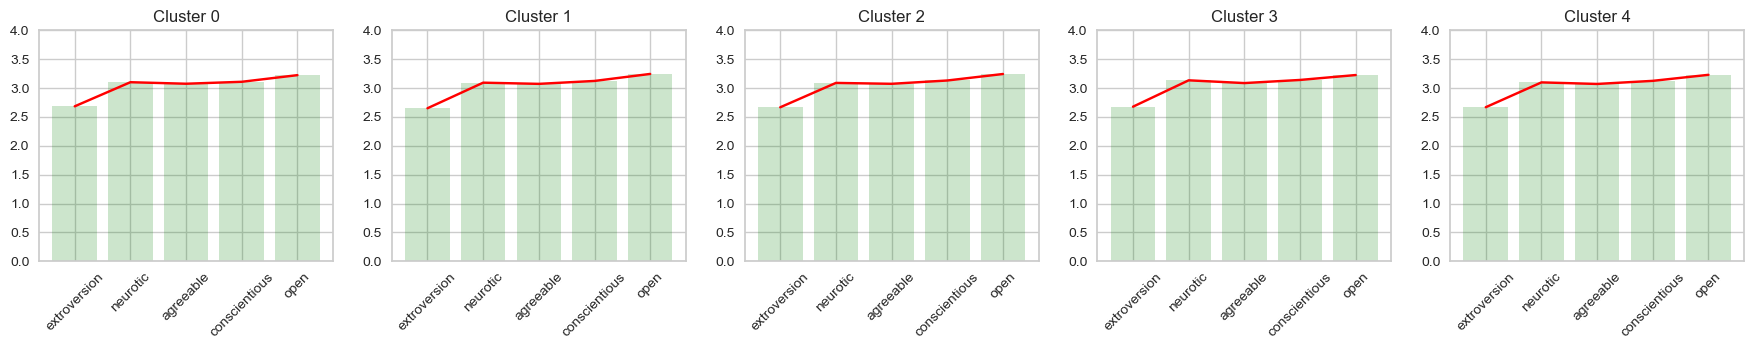

In [35]:
# Visualizing the means for each cluster
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[i,:], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[i,:], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4)

## Visualizing the Cluster Predictions

## PCA

[Principal Component Analysis (PCA)](https://rpubs.com/cyobero/pca-clustering#:~:text=Principal%20Component%20Analysis%20(PCA)%20is%20an%20unsupervised%20machine%20learning%20technique,Visualizing%20High%2DDimensional) is an unsupervised machine learning technique that attempts to derive a set of low-dimensional set of features from a much larger set while still preserving as much variance as possible.

In [36]:
# In order to visualize in 2D graph, PCA will be used
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,44046.698175,0.307823,4
1,305914.698171,2.156572,1
2,-55301.301826,-3.933364,4
3,413620.698171,3.324496,2
4,388961.698173,-0.847039,2


Text(0.5, 1.0, 'Personality Clusters after PCA')

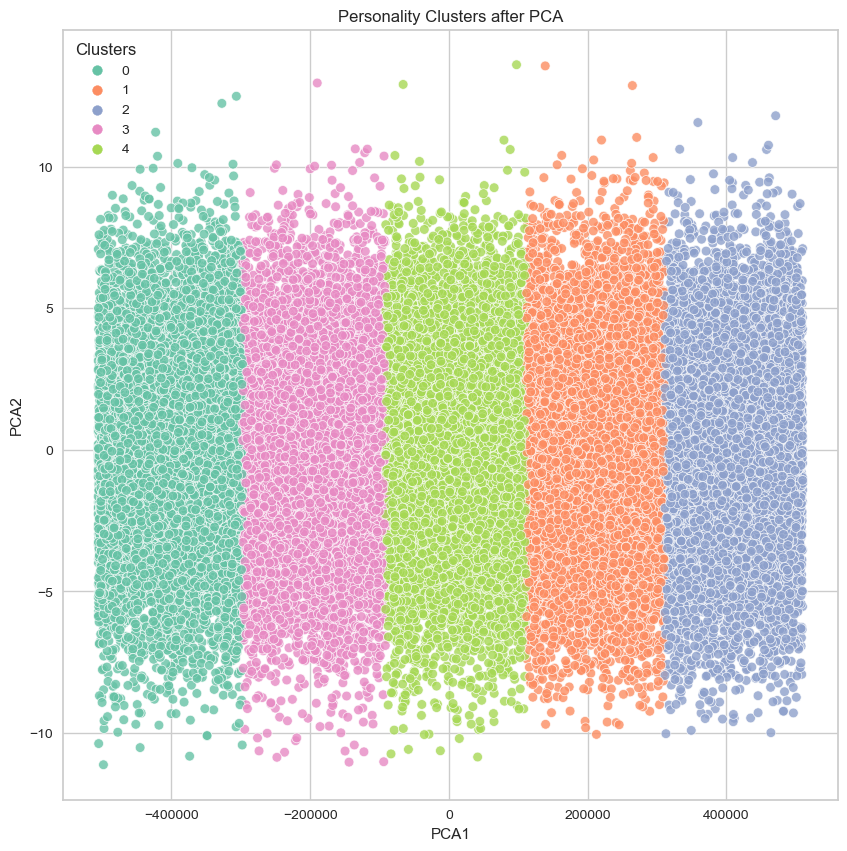

In [37]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA')

## Implementing the Model to See My Personality

I answered the questions in an Microsoft Excel spread sheet. 
Then I added that data into this notebook and put my answers to the model to see in which category I will be.

In [38]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:

my_data = pd.read_csv('C:/Users/86158/Desktop/semester 3/Personalisation-22-23-main/Personalisation-22-23-main/data/data_personality.csv')
my_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,2,3,3,2,2,5,2,4,5,4,2,3,4,5,2,2,1,1,3,1,2,5,1,5,2,5,1,3,5,5,5,1,4,1,4,1,5,2,5,5,3,2,4,2,5,1,5,2,5,5


In [41]:
# Summing up the my question groups
col_list = list(my_data)
ext = col_list[1:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

my_sums = pd.DataFrame()
my_sums['extroversion'] = my_data[ext].sum(axis=1)/10
my_sums['neurotic'] = my_data[est].sum(axis=1)/10
my_sums['agreeable'] = my_data[agr].sum(axis=1)/10
my_sums['conscientious'] = my_data[csn].sum(axis=1)/10
my_sums['open'] = my_data[opn].sum(axis=1)/10
# my_sums['cluster'] = my_personality
print('Sum of my question groups')
my_sums

Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open
0,3.0,2.4,3.4,3.3,3.4


# Assignment 3





# Tasks

In the questions, there is a clear self judgement bias where positive attributes (“I have a rich vocabulary) are rated higher than negative ones (“I do not have a good imagination”). This is demonstrated by steep negative or positive skews in the data 

A variety of these within a trait balances itself out as we can see by the 5 personality types all having reasonably similar means (~3)

## Task 1

Add 5 extra columns, each with the aggregated trait score (the mean of the 10 questions for that trait) for that participant.

Use this to show the mean of each trait over the whole dataset

**TIPS**
You can use ``keys_for_trait()`` to slice out all the questions for a particular trait

## Task 2

Write some code to rank the five traits on how much positive and negative skew there is in response to each question. 

E.g A trait where all of the questions had an equal spread of answers across 0-5 would rank lowly, and one where all the questions either skewed positively (from low to high) or negatively (from high to low) would rank highly 

**TIPS**
The function ``scipy.stat.skew()`` can give you the skew of data for a specific column (e.g. one question)

Again, you can use ``keys_for_trait()`` to slice out all the questions for a particular trait

Remember, highly skewed traits will contain questions skewed both positively and negatively

In [72]:
#TASK 1
data_sums
# calculate the mean of each trait over the whole dataset
mean_traits = data_sums[['extroversion', 'neurotic', 'agreeable', 'conscientious', 'open']].mean()

# print the mean of each trait
print(mean_traits)






extroversion     2.669659
neurotic         3.103290
agreeable        3.075726
conscientious    3.125482
open             3.233052
dtype: float64


In [73]:
data_sums

,extroversion,neurotic,agreeable,conscientious,open,clusters
0,2.4,3.6,2.9,2.1,2.5,4
1,2.5,3.5,3.2,3.3,3.4,1
2,3.2,2.5,3.3,3.0,3.2,4
3,2.3,2.6,2.6,2.7,3.3,2
4,2.3,3.2,2.7,2.8,2.6,2
...,...,...,...,...,...,...
49995,3.3,4.2,3.4,3.4,2.1,1
49996,2.0,3.9,3.5,3.2,2.9,4
49997,2.9,3.4,3.6,3.6,3.5,1
49998,3.2,2.2,2.9,3.6,3.7,3


In [74]:
for col in data_sums.columns:
    data[col] = data_sums[col]

data

,Unnamed: 0,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country,extroversion,neurotic,agreeable,conscientious,open,clusters
0,549499,2.0,3.0,2.0,2.0,5.0,1.0,3.0,1.0,5.0,2.0,4.0,2.0,3.0,2.0,5.0,5.0,4.0,4.0,5.0,3.0,2.0,3.0,1.0,4.0,2.0,3.0,3.0,3.0,5.0,4.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,4.0,TR,2.4,3.6,2.9,2.1,2.5,4
1,811367,2.0,3.0,2.0,4.0,3.0,3.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,5.0,3.0,3.0,2.0,4.0,2.0,4.0,3.0,5.0,2.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,US,2.5,3.5,3.2,3.3,3.4,1
2,450151,4.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,2.0,1.0,5.0,2.0,3.0,5.0,2.0,1.0,2.0,2.0,2.0,3.0,5.0,4.0,3.0,2.0,4.0,1.0,5.0,4.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,5.0,1.0,3.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,US,3.2,2.5,3.3,3.0,3.2,4
3,919073,1.0,4.0,3.0,5.0,1.0,2.0,1.0,5.0,1.0,4.0,2.0,4.0,2.0,3.0,2.0,2.0,2.0,1.0,4.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,4.0,3.0,1.0,2.0,3.0,5.0,3.0,4.0,1.0,5.0,1.0,1.0,2.0,3.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,5.0,4.0,4.0,US,2.3,2.6,2.6,2.7,3.3,2
4,894414,3.0,1.0,4.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,4.0,4.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,4.0,3.0,3.0,3.0,3.0,1.0,2.0,2.0,3.0,2.0,4.0,4.0,MY,2.3,3.2,2.7,2.8,2.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,777508,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,0.0,5.0,5.0,US,3.3,4.2,3.4,3.4,2.1,1
49996,571162,2.0,2.0,1.0,4.0,1.0,4.0,1.0,4.0,1.0,5.0,4.0,2.0,5.0,2.0,5.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,2.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0,2.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,3.0,4.0,2.0,PL,2.0,3.9,3.5,3.2,2.9,4
49997,691344,3.0,4.0,4.0,4.0,4.0,1.0,2.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,5.0,4.0,4.0,2.0,4.0,2.0,4.0,5.0,4.0,5.0,4.0,4.0,2.0,2.0,3.0,4.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,2.0,4.0,5.0,5.0,4.0,US,2.9,3.4,3.6,3.6,3.5,1
49998,347331,2.0,5.0,5.0,4.0,3.0,1.0,2.0,5.0,5.0,4.0,1.0,5.0,1.0,5.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,4.0,1.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,5.0,2.0,5.0,1.0,5.0,2.0,5.0,1.0,5.0,5.0,4.0,1.0,4.0,5.0,5.0,1.0,5.0,3.0,4.0,5.0,CA,3.2,2.2,2.9,3.6,3.7,3


In [79]:
#TASK 2
from scipy.stats import skew

traits = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']
skew_values = {}


for trait in traits:
    trait_questions = keys_for_trait(trait)
    trait_skew = data[trait_questions].apply(lambda x: abs(skew(x)), axis=0)
    skew_values[trait] = trait_skew.mean()


ranked_traits = sorted(skew_values.items(), key=lambda item: item[1], reverse=True)


for i, trait in enumerate(ranked_traits):
    print(f"{i+1}. {trait[0]}: {trait[1]}")

1. OPN: 0.9160248341115628
2. AGR: 0.7911908729827306
3. CSN: 0.41551821708113623
4. EXT: 0.28115235290261686
5. EST: 0.24645780810746895


In [78]:
print(questions)

{'EXT': {'EXT1': 'I am the life of the party', 'EXT2': 'I dont talk a lot', 'EXT3': 'I feel comfortable around people', 'EXT4': 'I keep in the background', 'EXT5': 'I start conversations', 'EXT6': 'I have little to say', 'EXT7': 'I talk to a lot of different people at parties', 'EXT8': 'I dont like to draw attention to myself', 'EXT9': 'I dont mind being the center of attention', 'EXT10': 'I am quiet around strangers'}, 'EST': {'EST1': 'I get stressed out easily', 'EST2': 'I am relaxed most of the time', 'EST3': 'I worry about things', 'EST4': 'I seldom feel blue', 'EST5': 'I am easily disturbed', 'EST6': 'I get upset easily', 'EST7': 'I change my mood a lot', 'EST8': 'I have frequent mood swings', 'EST9': 'I get irritated easily', 'EST10': 'I often feel blue'}, 'AGR': {'AGR1': 'I feel little concern for others', 'AGR2': 'I am interested in people', 'AGR3': 'I insult people', 'AGR4': 'I sympathize with others feelings', 'AGR5': 'I am not interested in other peoples problems', 'AGR6': '